In [1]:
import sys
sys.path.append('/Raid6/1/lishh/work/kSZ_ACT_SDSS/code/all/2025_12_29/')
from Theoretical_Power_Spectrum import Plk_theory


In [2]:
from nbodykit.lab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
import mcfit
import os
from multiprocessing import Pool
import sys

import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner
from multiprocessing import Pool

In [3]:
cosmo = cosmology.Cosmology(h=0.6766, T0_cmb=2.7255, Omega0_b=0.02242/0.6766**2, Omega0_cdm=0.11933/0.6766**2, N_ur=None, m_ncdm=[0.06], P_k_max=30.0, P_z_max=100.0, gauge='synchronous', n_s=0.9665, nonlinear=False, verbose=False).match(sigma8=0.8102)

In [4]:
z_eff=0.5

In [5]:
ells_dd_W=np.array([0,2,4])
ells_dp_W=np.array([1,3])


# mu=mu.reshape(len(mu),1)
# z_eff[cap]=0.63
# l=[0,2,4]
# k_th = np.logspace(-5, np.log10(100), 1024)
# ells=[0,2,4]
# sigma_v={}
# Pk_ms={}

a=1/(1+z_eff)
H=cosmo.efunc(z_eff)*100

Plin_func=cosmology.power.LinearPower(cosmo, redshift=0.)
    
k_output=np.logspace(np.log10(1e-3),np.log10(0.5),2048)

Plk_theory0=Plk_theory(Plin_func,k_output=k_output,k_min=1e-5,k_max=1e4,k_bin=2048,k_value_max=100,sigma_v_2_lin=True)

# k_W=wawm_combined.xin[0]
# k_W_PkSZ=wawm_combined_PkSZ.xin[0]
# P_dd_ell_AP_effect=np.zeros([ells_dd_W.size,k_W.size])
# iP_dp_ell_AP_effect=np.zeros([ells_dp_W.size,k_W.size])

/home/lishh/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "
/home/lishh/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/home/lishh/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/scipy/interpolate/fitpack2.py:626: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


In [6]:
r_s_ratio=1

In [7]:
D=cosmo.sigma8_z(z_eff)/cosmo.sigma8

In [8]:
f,b1,b2,sigma_v_2=0.7,2,-0.5,20
sigma_v_1_2=15
sigma_v_2_2=5

In [9]:
Plk_theory0.P_nm(f,D,b1,b2,sigma_v_2,sigma_v_1_2=sigma_v_1_2,sigma_v_2_2=sigma_v_2_2,)

In [10]:
alpha_p,alpha_v=1,1

In [14]:
P_dd0=Plk_theory0.P_dd_ell(ells_dd_W)
P_dp0=Plk_theory0.iP_dp_ell(a,H/alpha_p,ells_dp_W)

In [15]:
Plk_theory0.P_dd_interpolate(kind=1,ext=0)
Plk_theory0.iP_dp_interpolate(a,H/alpha_p,kind=1,ext=0)

In [16]:
mu=np.linspace(0,1,512)

In [17]:
P_dd_ell_AP_effect=2*Plk_theory0.P_dd_ell_AP_effect(ells_dd_W,k_output,mu,alpha_p,alpha_v,r_s_ratio)

iP_dp_ell_AP_effect=2*Plk_theory0.iP_dp_ell_AP_effect(ells_dp_W,k_output,mu,alpha_p,alpha_v,r_s_ratio)

In [18]:
P_dd_ell_AP_effect

array([[11583.49248904, 11616.34887101, 11649.29124593, ...,
        10148.04795893, 10201.16941239, 10253.90656095],
       [ 4942.07985804,  4956.09599307,  4970.14744942, ...,
        26077.14957725, 26246.51329067, 26414.8079534 ],
       [  258.32603587,   259.05835786,   259.79232764, ...,
        10051.73621736, 10116.88445229, 10181.5631569 ]])

In [19]:
iP_dp_ell_AP_effect

array([[-3.42841990e+08, -3.42771973e+08, -3.42701625e+08, ...,
        -1.01637250e+07, -1.02004868e+07, -1.02365072e+07],
       [-3.96653062e+07, -3.96571502e+07, -3.96489228e+07, ...,
        -6.76254929e+06, -6.78541037e+06, -6.80776182e+06]])

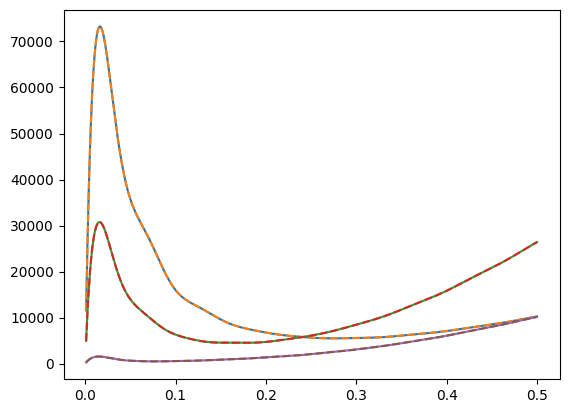

In [22]:
for ii in range(len(ells_dd_W)):
    plt.plot(k_output,P_dd0[ii])
    plt.plot(k_output,P_dd_ell_AP_effect[ii],ls='--')

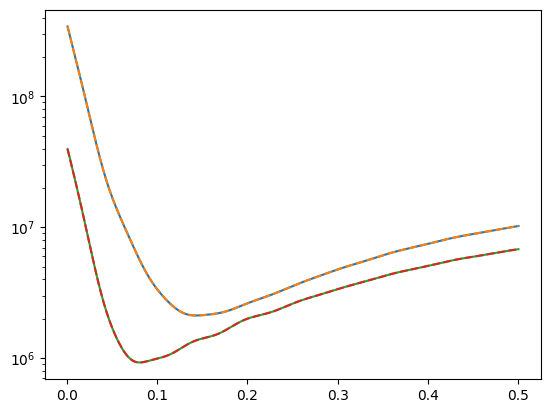

In [26]:
for ii in range(len(ells_dp_W)):
    plt.plot(k_output,np.abs(P_dp0[ii]))
    plt.plot(k_output,np.abs(iP_dp_ell_AP_effect[ii]),ls='--')
plt.yscale('log')